# Loading Library

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing 
import nltk, string, re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Splitting Data
from sklearn.model_selection import train_test_split

# Building Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import pickle

# Loading Data

In [2]:
data = pd.read_csv(r"D:\Courses language programming\LLM - Transformer - NLP\NLP - Complete Course\Projects For NLP\Data\a1_RestaurantReviews_HistoricDump.tsv", delimiter="\t")

data.head(5)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  900 non-null    object
 1   Liked   900 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.2+ KB


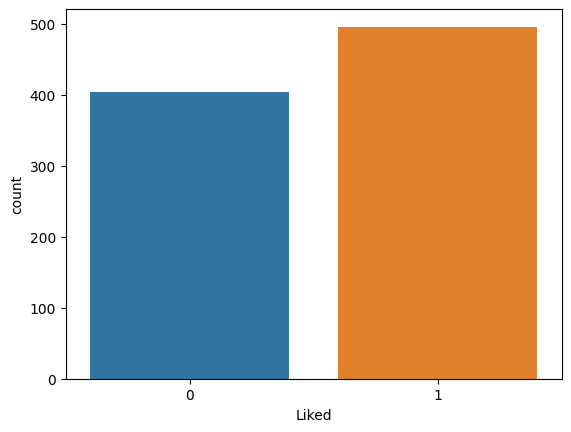

In [5]:
sns.countplot(x='Liked', data=data)
plt.show()

# Preprocessing

In [6]:
punc = list(string.punctuation)
stop_words = stopwords.words("english")
lemma = WordNetLemmatizer()

In [7]:
def process_data(data):
    data = data.lower()
    data = re.sub('[^a-zA-Z]', ' ', data)
    data = " ".join([word for word in word_tokenize(data) if ((word not in punc) and (word not in stop_words))])
    return data

In [8]:
data["Review"] = data["Review"].apply(process_data)

In [9]:
data.head()

,Review,Liked
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great prices,1


# Splitting Data

In [10]:
X = data["Review"]
Y = data["Liked"].astype('int')

# Feature Extraction

## TF-IDF

In [11]:
TF_IDF = TfidfVectorizer()
X_TFIDF = TF_IDF.fit_transform(X)
X_TFIDF[:2]

<2x1755 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [20]:
X.iloc[0], Y[0]

('wow loved place', 1)

## CountVectorizer

In [12]:
bag_of_words = CountVectorizer()
X_bow = bag_of_words.fit_transform(X)
X_bow[:2]

<2x1755 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

# Splitting Data Into Training & Testing

In [13]:
x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, Y, train_size=0.7)
x_train_TFIDF, x_test_TFIDF, y_train_TFIDF, y_test_TFIDF = train_test_split(X_TFIDF, Y, train_size=0.7)

# Building Model

## MultinomialNB

In [14]:
model_bow = MultinomialNB()
model_bow.fit(x_train_bow, y_train_bow)

print('THe Training Score is --> ', model_bow.score(x_train_bow, y_train_bow))
print('THe Testing Score is --> ', model_bow.score(x_test_bow, y_test_bow))

THe Training Score is -->  0.9650793650793651
THe Testing Score is -->  0.7555555555555555


In [15]:
model_tfidf = MultinomialNB()
model_tfidf.fit(x_train_TFIDF, y_train_TFIDF)

print('THe Training Score is --> ', model_tfidf.score(x_train_TFIDF, y_train_TFIDF))
print('THe Testing Score is --> ', model_tfidf.score(x_test_TFIDF, y_test_TFIDF))

THe Training Score is -->  0.9587301587301588
THe Testing Score is -->  0.7111111111111111


## RandomForest

In [16]:
model_bow_rf = RandomForestClassifier()
model_bow_rf.fit(x_train_bow, y_train_bow)

print('THe Training Score is --> ', model_bow_rf.score(x_train_bow, y_train_bow))
print('THe Testing Score is --> ', model_bow_rf.score(x_test_bow, y_test_bow))

THe Training Score is -->  0.9984126984126984
THe Testing Score is -->  0.725925925925926


In [17]:
model_tfidf_rf = RandomForestClassifier()
model_tfidf_rf.fit(x_train_TFIDF, y_train_TFIDF)

print('THe Training Score is --> ', model_tfidf_rf.score(x_train_TFIDF, y_train_TFIDF))
print('THe Testing Score is --> ', model_tfidf_rf.score(x_test_TFIDF, y_test_TFIDF))

THe Training Score is -->  1.0
THe Testing Score is -->  0.7296296296296296


# Save

In [18]:
pickle.dump(TF_IDF, open(r'D:\Pycharm\Computer Vision Project\NLP Project\Sentiment Analysis (English)\TFIDF.bin', 'wb'))
pickle.dump(model_tfidf_rf, open(r'D:\Pycharm\Computer Vision Project\NLP Project\Sentiment Analysis (English)\rf_model.bin', 'wb'))

# Deploy

In [ ]:
import streamlit as st
import pickle


model = pickle.load(open(r'D:\Pycharm\Computer Vision Project\NLP Project\Sentiment Analysis (English)\rf_model.bin', 'rb'))
tokenizer = pickle.load(open(r'D:\Pycharm\Computer Vision Project\NLP Project\Sentiment Analysis (English)\TFIDF.bin', 'rb'))
class_label = {1: 'Good', 0: 'Bad'}
st.title('Sentiment Analysis (English). 📰️')

text = st.text_input('Enter THe Text')
if text:
    text = tokenizer.transform([text])
    if st.button('predict'):
        prediction = model.predict(text)[0]
        st.write(class_label[prediction])


# Creating Using Hugging Face

In [26]:
# from transformers import pipeline

# distilled_student_sentiment_classifier = pipeline(
#     model="lxyuan/distilbert-base-multilingual-cased-sentiments-student", 
#     return_all_scores=True
# )

In [27]:
# # english
# distilled_student_sentiment_classifier ("I love this movie and i would watch it again and again!")
# >> [[{'label': 'positive', 'score': 0.9731044769287109},
#   {'label': 'neutral', 'score': 0.016910076141357422},
#   {'label': 'negative', 'score': 0.009985478594899178}]]

# # malay
# distilled_student_sentiment_classifier("Saya suka filem ini dan saya akan menontonnya lagi dan lagi!")
# [[{'label': 'positive', 'score': 0.9760093688964844},
#   {'label': 'neutral', 'score': 0.01804516464471817},
#   {'label': 'negative', 'score': 0.005945465061813593}]]

# # japanese
# distilled_student_sentiment_classifier("私はこの映画が大好きで、何度も見ます！")
# >> [[{'label': 'positive', 'score': 0.9342429041862488},
#   {'label': 'neutral', 'score': 0.040193185210227966},
#   {'label': 'negative', 'score': 0.025563929229974747}]]
